In [2]:
from aaindex import Aaindex
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%config Completer.use_jedi = False

# process-aaindex-group

In [4]:
dfna = pd.read_csv('Appendix2.txt', sep='\t').set_index('accession_number')['subgroup']

with open ('Appendix.txt', 'r') as f:
    s = f.readlines()
    
data = ''.join(s).split('\n\n')[2:]
data = [i.strip() for i in data]
name = pd.Series(data).iloc[::2]
value = pd.Series(data).iloc[1::2]
value = value.reset_index(drop=True)
name = name.apply(lambda x:x.split('.  ')).apply(pd.Series).reset_index(drop=True)
name.columns = ['group', 'group_info']
v = value.apply(lambda x:x.split('\n')).apply(lambda x:pd.DataFrame([i.split('  ') for i in x]))
res = []
for key, df in v.iteritems():
    df.columns = ['id','key','description']
    df['group'] = name.loc[key].group
    df['group_info'] = name.loc[key].group_info
    res.append(df)
    
df = pd.concat(res)
df.set_index('key').to_csv('./result_data/Tomii_aa_group_info.csv')

# process-aaindex-content

In [5]:
aaindex = Aaindex()

## index1

In [6]:
full_list = aaindex.get_all(dbkey='aaindex1')

meta = []
data = []
for rd in tqdm(full_list, ascii=True):
    key = rd[0]
    record = aaindex.get(key, dbkey='aaindex1')
    res = dict(accession_number = record.accession_number,
                description = record.data_description,
                similar_entities = record.similar_entities,
                author = record.author,
                title = record.title,
                journal_reference = record.journal_reference,
                pmid = record.pmid)
    index_data = record.index_data
    meta.append(res)
    data.append(index_data)
    
df1 = pd.concat(data, axis=1).T
df1_meta = pd.DataFrame(meta)

df1.to_csv('./result_data/01_aaindex.csv')
df1_meta.to_pickle('./result_data/01_aaindex_meta.pkl')

100%|##########| 566/566 [08:31<00:00,  1.11it/s]


## index2

In [7]:
full_list = aaindex.get_all(dbkey='aaindex2')
meta = []
data = []
for rd in tqdm(full_list, ascii=True):
    key = rd[0]
    record = aaindex.get(key, dbkey='aaindex2')
    res = dict(accession_number = record.accession_number,
                description = record.data_description,
                similar_entities = record.similar_entities,
                author = record.author,
                title = record.title,
                journal_reference = record.journal_reference,
                pmid = record.pmid)
    index_data = record.index_data
    meta.append(res)
    data.append(index_data)

100%|##########| 94/94 [01:24<00:00,  1.11it/s]


In [8]:
df2 = pd.concat(data,axis=1).loc[index_data.sort_index().index].T
df2_meta = pd.DataFrame(meta)
df2.to_csv('./result_data/02_aametrix.csv')
df2_meta.to_pickle('./result_data/02_aametrix_meta.pkl')

## index3

In [9]:
full_list = aaindex.get_all(dbkey='aaindex3')
meta = []
data = []
for rd in tqdm(full_list, ascii=True):
    key = rd[0]
    record = aaindex.get(key, dbkey='aaindex3')
    res = dict(accession_number = record.accession_number,
                description = record.data_description,
                similar_entities = record.similar_entities,
                author = record.author,
                title = record.title,
                journal_reference = record.journal_reference,
                pmid = record.pmid)
    index_data = record.index_data
    meta.append(res)
    data.append(index_data)

100%|##########| 47/47 [00:42<00:00,  1.10it/s]


In [10]:
df3 = pd.concat(data,axis=1).loc[index_data.sort_index().index].T
df3_meta = pd.DataFrame(meta)
df3.to_csv('./result_data/03_aametrix.csv')
df3_meta.to_pickle('./result_data/03_aametrix_meta.pkl')

## merge all as one, fill nan

In [11]:
# Current list of amino acid indices
# Current list of amino acid mutation matrices
# Current list of amino acid pair-wise contact potentials

In [12]:
df1_meta['group'] = 'indices'
df1_meta = df1_meta.set_index('accession_number')
df = df.set_index('key')
subgroup = df['group'] + ','+ df['group_info']
subgroup = subgroup.append(dfna)
df1_meta['subgroup'] = df1_meta.index.map(subgroup)


df2_meta['group'] = 'mutation matrices'
df3_meta['group'] = 'pair-wise contact potentials'
dfmeta = df1_meta.append(df2_meta.set_index('accession_number')).append(df3_meta.set_index('accession_number'))
dfmeta.to_csv('./result_data/all_meta.csv')

In [13]:
df11 = df1.apply(lambda row: row.fillna(row.mean()), axis=1)
df11 = df11.unstack().reset_index()
df11.columns = ['animo_acid_key', 'accession_number', 'value']
df11['group'] = 'indices'
df11 = df11.sort_values(['accession_number', 'animo_acid_key'])

df22 = df2.apply(lambda row: row.fillna(row.mean()), axis=1)
df22 = df22.unstack().reset_index()
df22.columns = ['animo_acid_key', 'accession_number', 'value']
df22['group'] = 'mutation matrices'
df22 = df22.sort_values(['accession_number', 'animo_acid_key'])

df33 = df3.apply(lambda row: row.fillna(row.mean()), axis=1)
df33 = df33.unstack().reset_index()
df33.columns = ['animo_acid_key', 'accession_number', 'value']
df33['group'] = 'pair-wise contact potentials'
df33 = df33.sort_values(['accession_number', 'animo_acid_key'])

dfall = df11.append(df22).append(df33).reset_index(drop=True).set_index(['accession_number', 'animo_acid_key'])
dfall.to_csv('./result_data/all_data.csv')

In [14]:
df11

,animo_acid_key,accession_number,value,group
0,A,ANDN920101,4.35,indices
4528,C,ANDN920101,4.65,indices
3396,D,ANDN920101,4.76,indices
6792,E,ANDN920101,4.29,indices
3962,F,ANDN920101,4.66,indices
...,...,...,...,...
6627,S,ZIMJ680105,6.90,indices
7759,T,ZIMJ680105,9.50,indices
11155,V,ZIMJ680105,14.30,indices
8891,W,ZIMJ680105,17.10,indices


In [ ]:
d = mp.aaindex.data.T[['ANDN920101']]

res = []
for i in d.index:
    for j in d.index:
        res.append('%s,%s' % (i,j))
        
pd.DataFrame(pairwise_distances(d).reshape(-1,), index = res)

In [28]:
dfmeta.head(3)

,description,similar_entities,author,title,journal_reference,pmid,group,subgroup
accession_number,,,,,,,,
ANDN920101,"alpha-CH chemical shifts (Andersen et al., 1992)","[(BUNA790102, 0.949)]","Andersen, N.H., Cao, B. and Chen, C.",Peptide/protein structure analysis using the c...,"Biochem. and Biophys. Res. Comm. 184, 1008-101...",PMID:1575719,indices,"P,Physicochemical properties"
ARGP820101,"Hydrophobicity index (Argos et al., 1982)","[(JOND750101, 1.0), (SIMZ760101, 0.967), (GOLD...","Argos, P., Rao, J.K.M. and Hargrave, P.A.",Structural prediction of membrane-bound proteins,"Eur. J. Biochem. 128, 565-575 (1982)",PMID:7151796,indices,"H,Hydrophobicity"
ARGP820102,Signal sequence helical potential (Argos et al...,"[(ARGP820103, 0.961), (KYTJ820101, 0.803), (JU...","Argos, P., Rao, J.K.M. and Hargrave, P.A.",Structural prediction of membrane-bound proteins,"Eur. J. Biochem. 128, 565-575 (1982)",PMID:7151796,indices,"H,Hydrophobicity"


In [29]:
dfall.head(3)

value    group
accession_number animo_acid_key                
ANDN920101       A                4.35  indices
                 C                4.65  indices
                 D                4.76  indices

In [17]:
import numpy as np

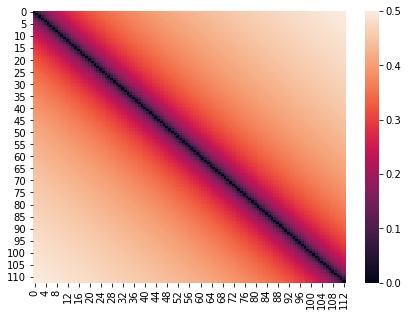

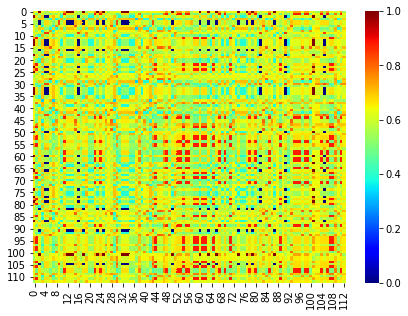

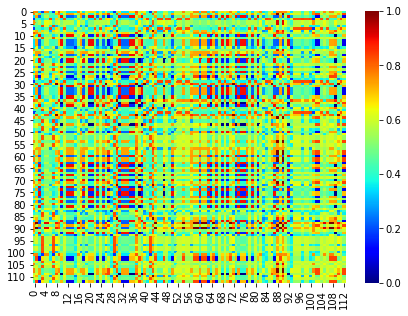

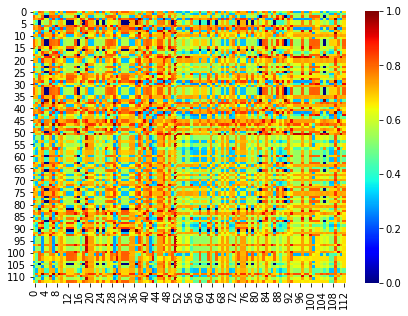

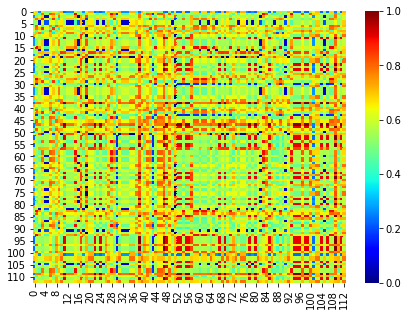

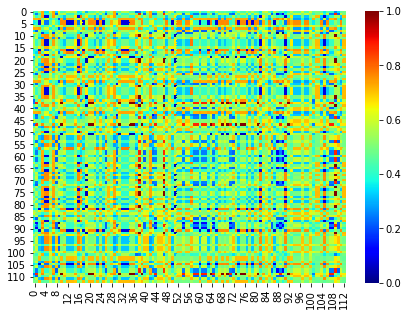

In [42]:
from sklearn.metrics import pairwise_distances
aas = '''MVADPPRDSKGLAAAEPTANGGLALASIEDQGAAAGGYCGSRDQVRRCLRANLLVLLTVVAVVAGVALGLGVSGAGGALALGPERLSAFVFPGELLLRLLRMIILPLVVCSLI'''
res = []
for i in aas:
    for j in aas:
        res.append('%s,%s' % (i,j))
        
d = np.arange(len(aas)).reshape(113, 1) 
d2 = np.log10(pairwise_distances(d, metric='l1') + 1)

d2 = (d2 - d2.min())/((d2.max()-d2.min()))*0.5

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(d2, ax=ax)

for i in dfmeta.index[-30:-25]:
    s = pd.Series(res).map(dfall.loc[i]['value'])
    x = s.values.reshape(len(aas), len(aas))
    x = (x - x.min())/(x.max()-x.min())
    fig, ax = plt.subplots(figsize=(7,5))
    sns.heatmap(x, ax = ax, cmap='jet')